In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("carInsurance_train_846178.csv")
test=pd.read_csv("carInsurance_test_971187.csv")

In [3]:
train.head(4)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1


In [4]:
test.head(4)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN


In [5]:
test.CarInsurance.unique()

array([nan])

In [6]:
test.drop("CarInsurance",axis=1,inplace=True)

In [7]:
train.shape

(4000, 19)

In [8]:
train.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [9]:
test.isnull().sum()

Id                    0
Age                   0
Job                   5
Marital               0
Education            47
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       221
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome             757
CallStart             0
CallEnd               0
dtype: int64

In [10]:
train=train.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [11]:
test=test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
test.duplicated().sum()

0

In [13]:
train.duplicated().sum()

0

In [14]:
for i in train.columns:
    print(i)
    print(train[i].sort_values().unique(),'\n')

Id
[   1    2    3 ... 3998 3999 4000] 

Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 75 76 77 78 79 80 81 82 83 84 86 87 92 95] 

Job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed'] 

Marital
['divorced' 'married' 'single'] 

Education
['primary' 'secondary' 'tertiary'] 

Default
[0 1] 

Balance
[-3058 -1730 -1317 ... 45248 52587 98417] 

HHInsurance
[0 1] 

CarLoan
[0 1] 

Communication
['cellular' 'telephone'] 

LastContactDay
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] 

LastContactMonth
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep'] 

NoOfContacts
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 34 38 41 43] 

DaysPassed
[ -1   1   2   4   5

In [15]:
for i in test.columns:
    print(i)
    print(test[i].sort_values().unique(),'\n')

Id
[4001 4002 4003 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013 4014
 4015 4016 4017 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027 4028
 4029 4030 4031 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041 4042
 4043 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055 4056
 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070
 4071 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083 4084
 4085 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097 4098
 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111 4112
 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125 4126
 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139 4140
 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153 4154
 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167 4168
 4169 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179 4180 4181 4182
 4183 4184 4185 4186 4187 4188 4189 4190 4191 4192 4193 4194 4195 4196
 41

<AxesSubplot:>

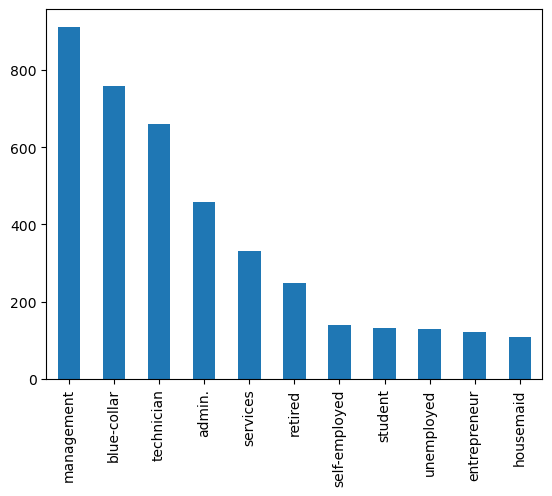

In [16]:
train["Job"].value_counts().plot.bar()

<AxesSubplot:>

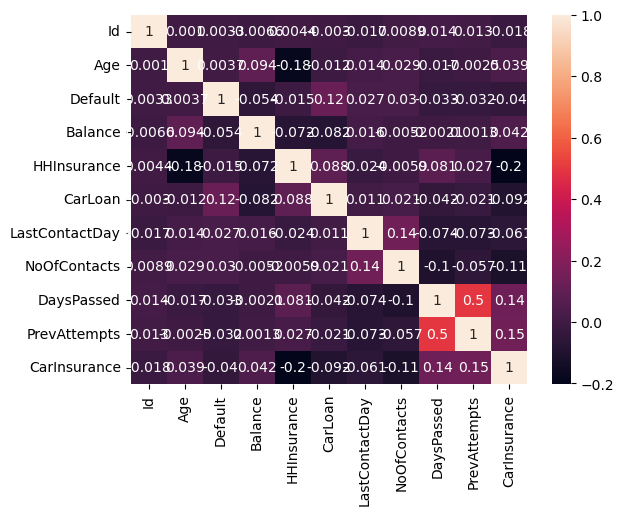

In [17]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

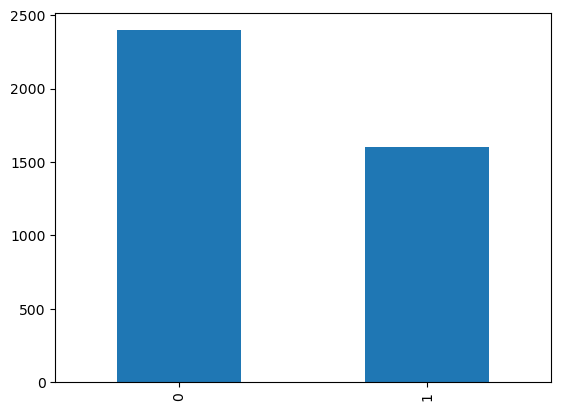

In [18]:
train['CarInsurance'].value_counts().plot.bar()

In [19]:
train.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

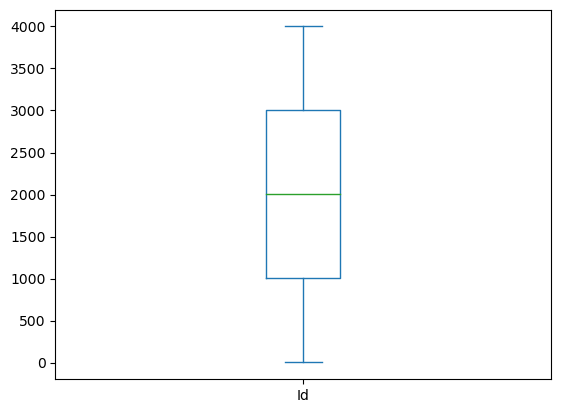

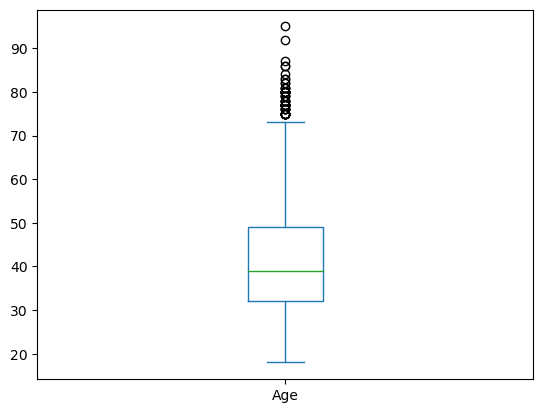

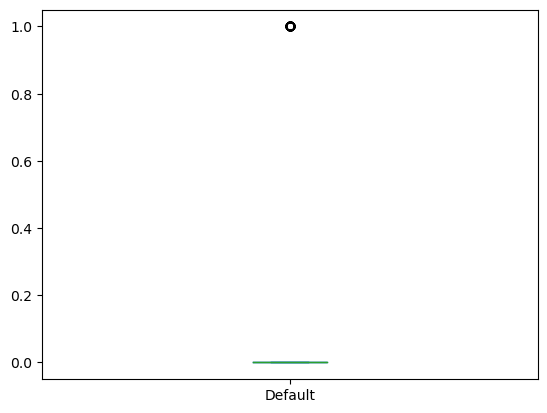

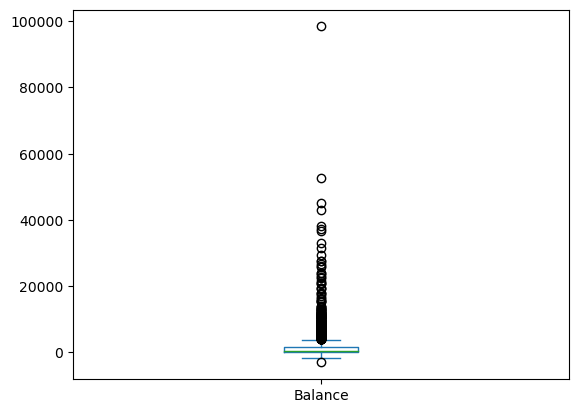

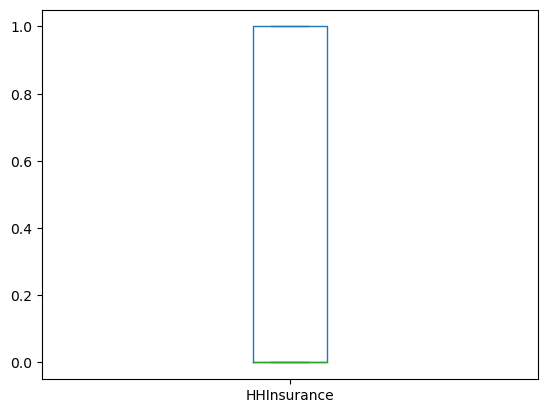

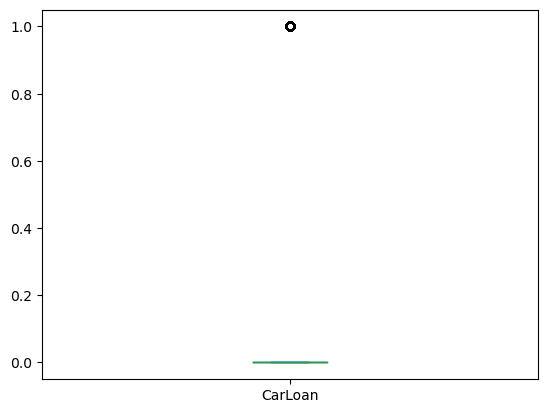

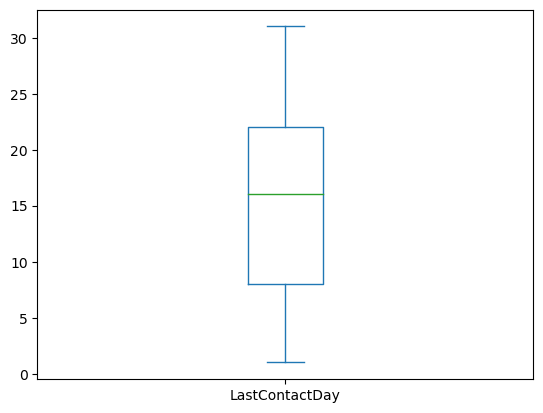

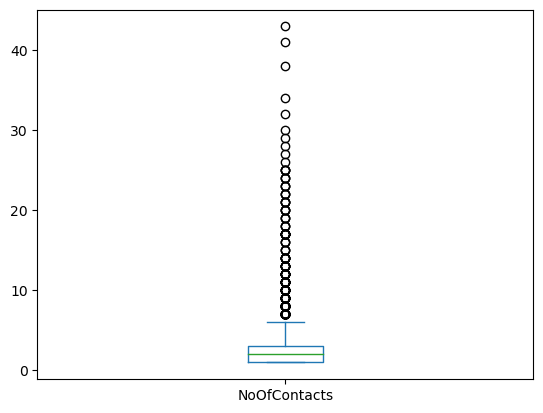

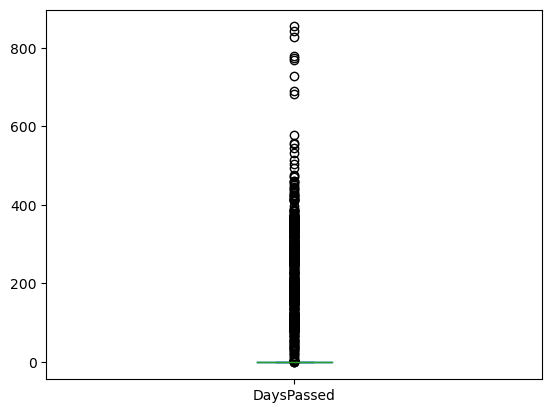

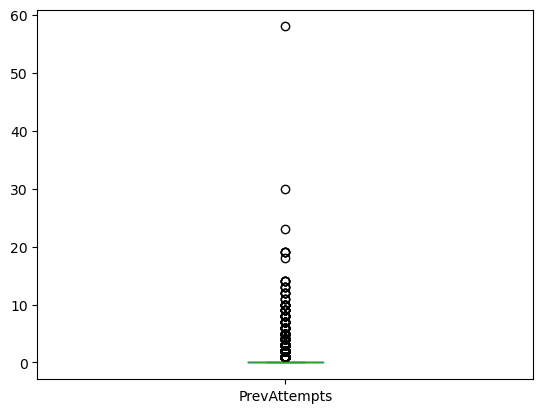

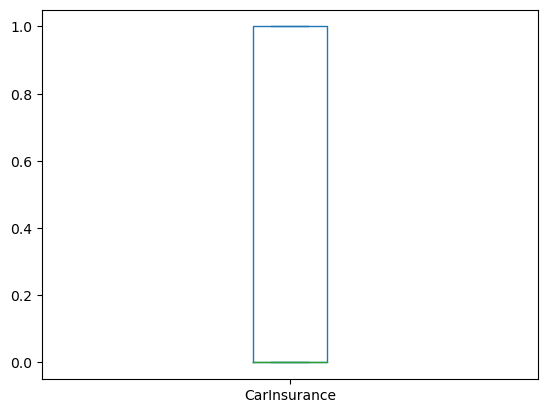

In [20]:
for i in train.columns:
    if(train[i].dtype!='object'):
        train[i].plot(kind='box')
        plt.show()

In [21]:
for i in train.columns:
    if(train[i].dtype!='object'):
        p_25 = train[i].quantile(.25)
        p_75 = train[i].quantile(.75)
        iqr = p_75 - p_25
        lc = p_25 - 1.5* iqr
        uc = p_75 + 1.5 * iqr
        train[i].clip(lower= lc, upper= uc, inplace= True)

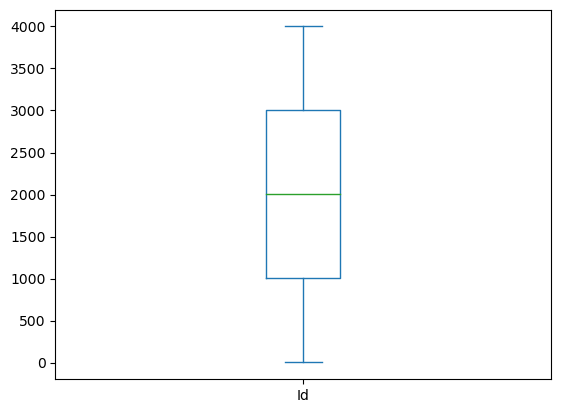

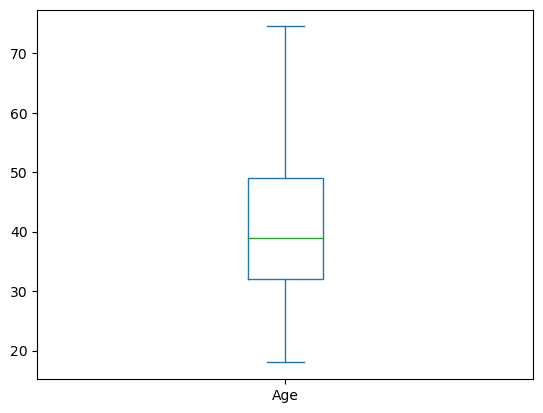

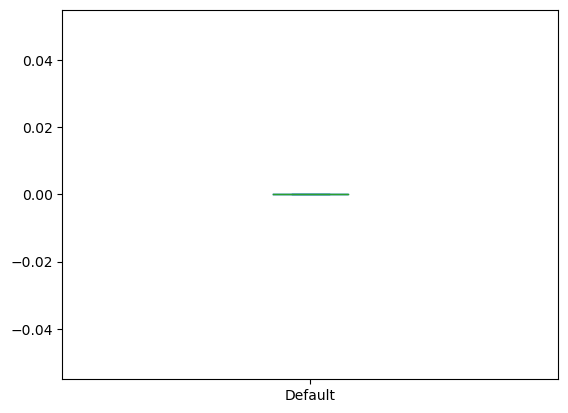

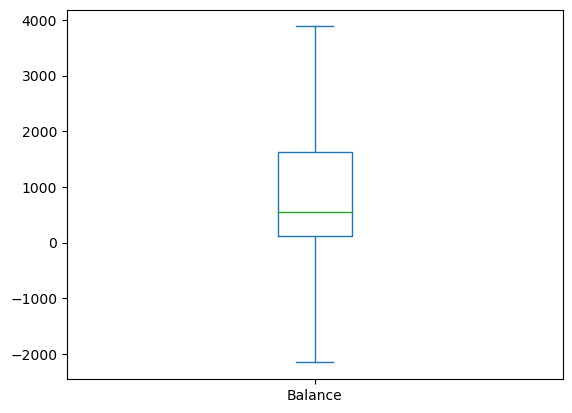

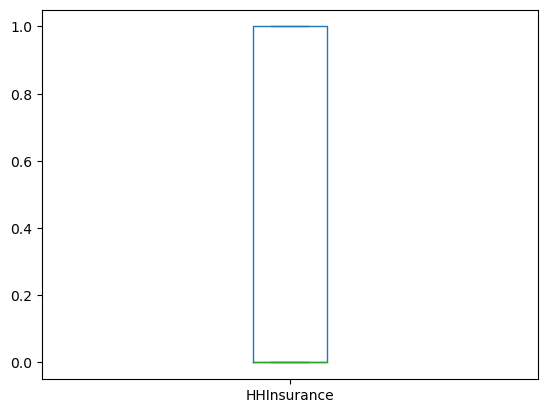

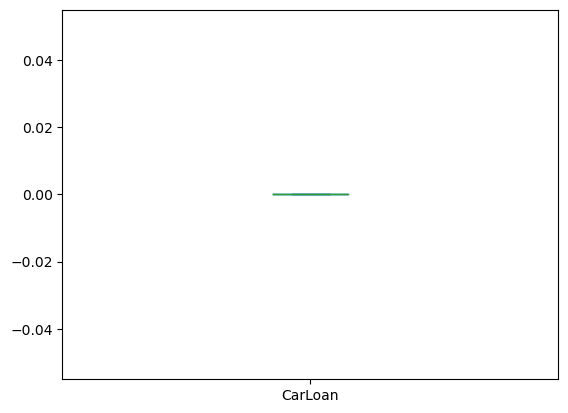

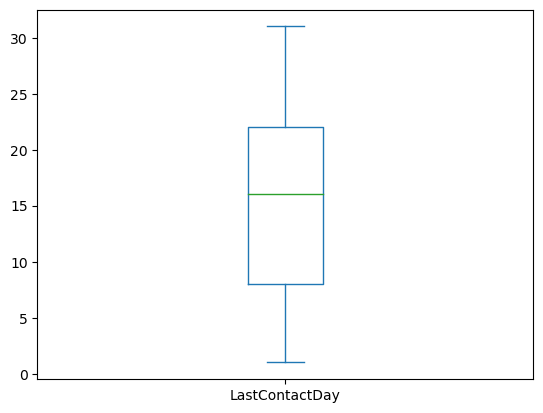

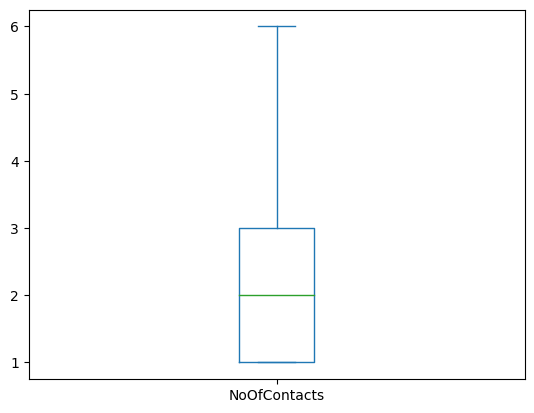

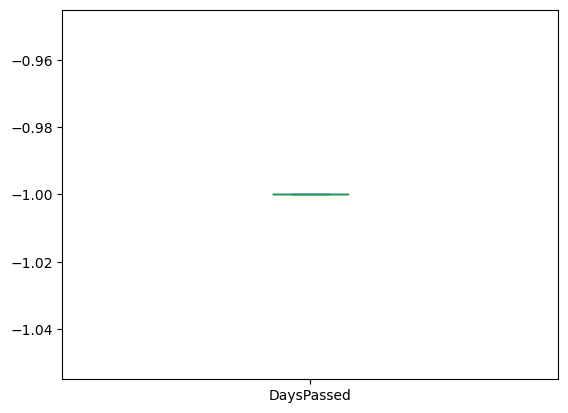

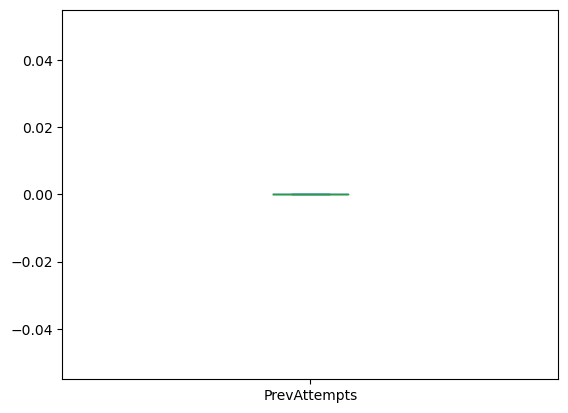

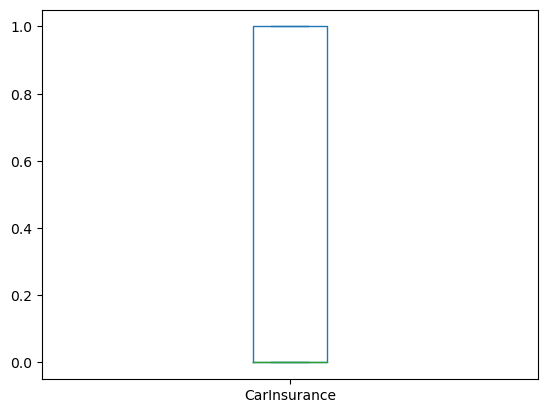

In [22]:
for i in train.columns:
    if(train[i].dtype!='object'):
        train[i].plot(kind='box')
        plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le = LabelEncoder()

In [24]:
for i in train.columns:
    if train[i].dtype == 'object':
        train[i]= le.fit_transform(train[i])

In [25]:
train

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32.0,4,2,2,0.0,1218.0,1,0.0,1,28,4,2.0,-1.0,0.0,0,1965,1914,0
1,2,32.0,1,1,0,0.0,1156.0,1,0.0,0,26,8,5.0,-1.0,0.0,0,2417,2393,0
2,3,29.0,4,2,2,0.0,637.0,1,0.0,0,3,6,1.0,-1.0,0.0,0,3145,3111,1
3,4,25.0,8,2,0,0.0,373.0,1,0.0,0,11,8,2.0,-1.0,0.0,0,1263,1314,1
4,5,30.0,4,1,2,0.0,2694.0,0,0.0,0,3,6,1.0,-1.0,0.0,0,2326,2293,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28.0,9,2,2,0.0,0.0,1,0.0,0,25,8,1.0,-1.0,0.0,0,3680,3656,1
3996,3997,49.0,0,0,1,0.0,124.0,1,0.0,0,29,5,6.0,-1.0,0.0,0,2422,2383,0
3997,3998,27.0,0,2,1,0.0,-400.0,0,0.0,0,8,5,1.0,-1.0,0.0,0,1351,1343,0
3998,3999,36.0,2,2,2,0.0,658.0,1,0.0,0,29,4,1.0,-1.0,0.0,0,1026,1006,0


In [26]:
for i in test.columns:
    if test[i].dtype == 'object':
        test[i]= le.fit_transform(test[i])

In [27]:
test

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd
0,4001,25,0,2,1,0,1,1,1,0,12,8,12,-1,0,0,920,903
1,4002,40,4,1,2,0,0,1,1,0,24,5,1,-1,0,0,26,17
2,4003,44,4,2,2,0,-1313,1,1,0,15,8,10,-1,0,0,726,713
3,4004,27,7,2,1,0,6279,1,0,0,9,9,1,-1,0,0,88,82
4,4005,53,9,1,1,0,7984,1,0,0,2,3,1,-1,0,0,847,835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,0,2,1,0,131,1,0,0,15,6,1,-1,0,0,549,536
996,4997,52,4,1,2,0,2635,0,0,0,6,11,1,108,8,2,461,459
997,4998,46,9,1,2,0,3009,0,0,0,4,1,2,-1,0,0,166,157
998,4999,60,5,1,1,0,7038,0,0,1,7,10,4,-1,0,0,895,877


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

In [29]:
X_train = train.drop(["CarInsurance"], axis=1)
Y_train = train["CarInsurance"]

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(test)

In [33]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
Y_pred = model.predict(X_test)

In [36]:
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,